In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
from pandas.tseries.frequencies import to_offset

In [2]:
plt.style.use("seaborn")
cf.set_config_file(offline = True)

In [3]:
df = pd.read_csv("eurusd.csv",parse_dates = ["Date"],index_col = "Date" )

In [4]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


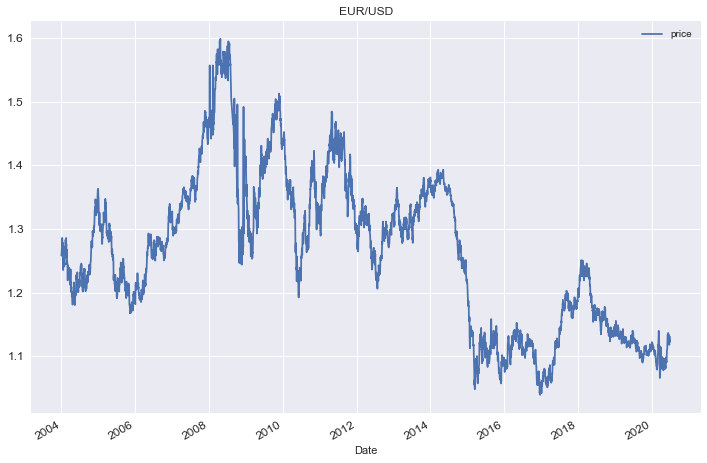

In [6]:
df.plot(figsize = (12,8),title = "EUR/USD", fontsize =12)
plt.show()

In [7]:
df["returns"] = np.log(df.div(df.shift(1)))

In [8]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


# A simple buy and hold strategy

In [9]:
df.dropna(inplace = True)

In [10]:
df


,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


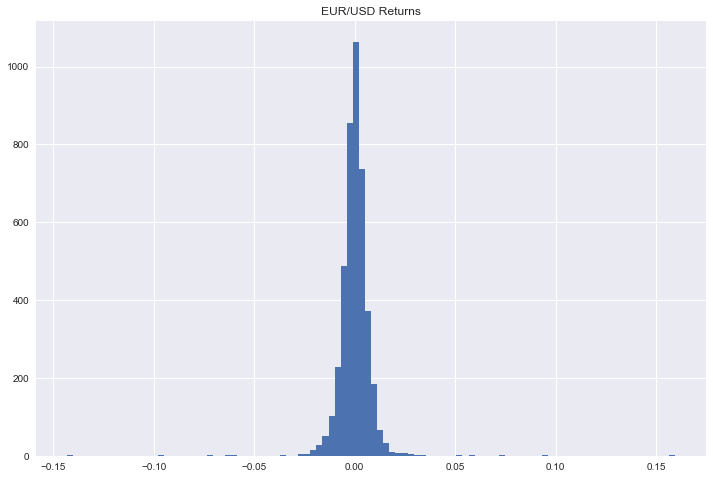

In [11]:
df.returns.hist(bins = 100,figsize = (12,8))
plt.title("EUR/USD Returns")
plt.show()

In [12]:
df.returns.sum()

-0.11214302770699758

In [13]:
np.exp(df.returns.sum())

0.8939163935445148

In [14]:
df.price[-1]/df.price[0]

0.8939163935445141

In [15]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [16]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


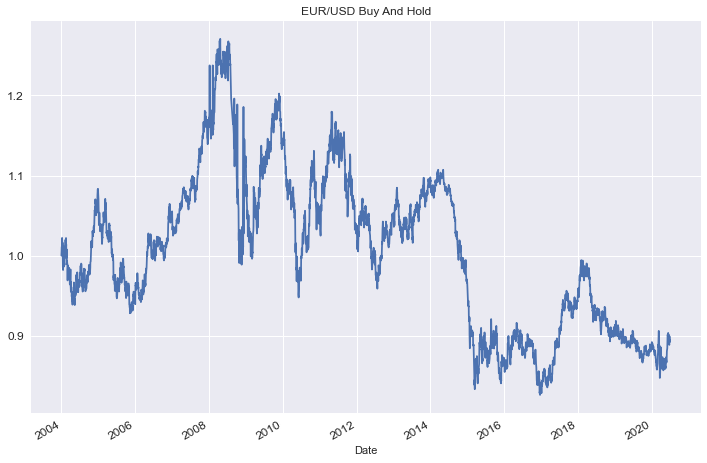

In [17]:
df.creturns.plot(figsize = (12,8),title = "EUR/USD Buy And Hold",fontsize = 12)
plt.show()

# Performance Metrics

In [18]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


# Absolute performance

In [19]:
df.creturns.iloc[-1]

0.8939163935445149

In [20]:
df.returns.sum()

-0.11214302770699758

In [21]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


# Risk

In [22]:
df.returns.mean()

-2.62384248261576e-05

In [23]:
df.returns.std()

0.007593382157663375

## Maximum Drawdown

In [24]:
df["cummax"] = df.creturns.cummax()

In [25]:
df


,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


In [26]:
drawdown = df["cummax"] - df["creturns"]

In [27]:
drawdown


Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [28]:
drawdown.max()

0.4448840569933439

In [29]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

In [30]:
sma_s = 50
sma_l = 200

In [41]:
data = pd.read_csv("eurusd.csv",parse_dates = ["Date"],index_col = "Date" )

In [42]:
data


,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [43]:
data.price.rolling(50)

Rolling [window=50,center=False,axis=0]

In [44]:
data["Sma_s"] = data.price.rolling(sma_s).mean()

In [45]:
data["Sma_l"] = data.price.rolling(sma_l).mean()

In [46]:
data

,price,Sma_s,Sma_l
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


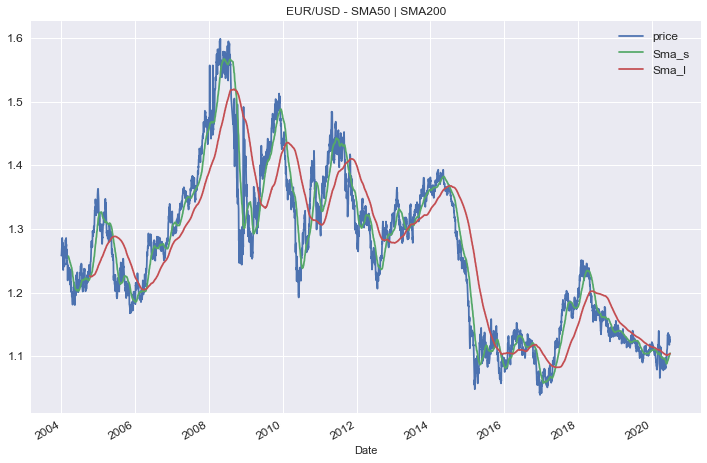

In [47]:
data.plot(figsize = (12,8),title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [48]:
data.dropna(inplace=True)

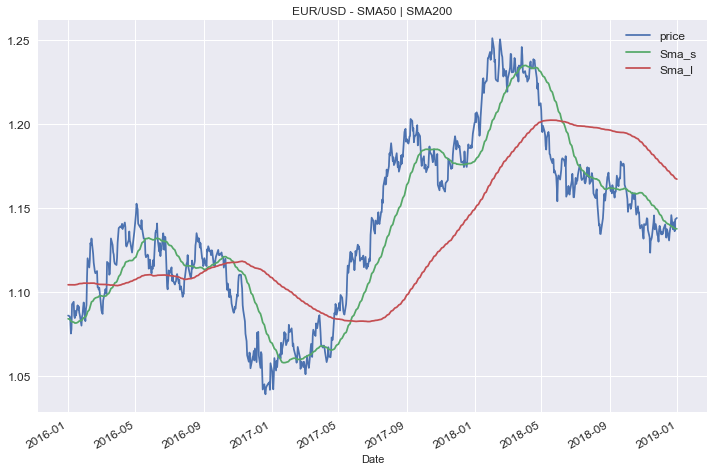

In [49]:
data.loc["2016":"2018"].plot(figsize = (12,8),title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [51]:
data["postion"] = np.where(data["Sma_s"] > data["Sma_l"],1,-1)

In [52]:
data

,price,Sma_s,Sma_l,postion
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


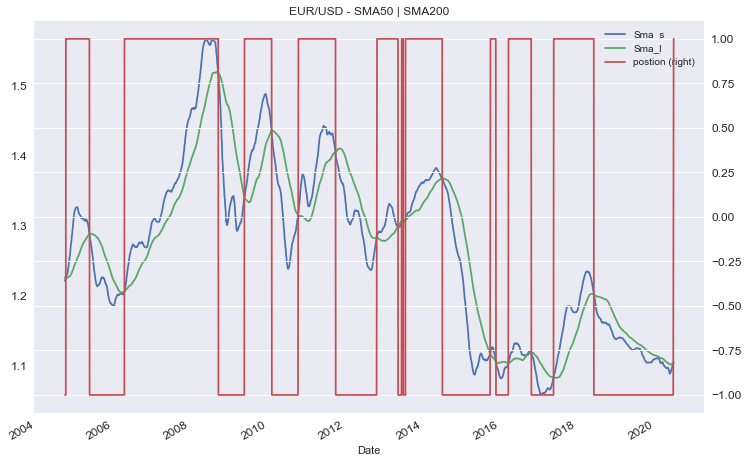

In [57]:
data.loc[:,["Sma_s","Sma_l","postion"]].plot(figsize = (12,8),title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l)
                                            ,fontsize = 12,secondary_y ="postion")
plt.show()

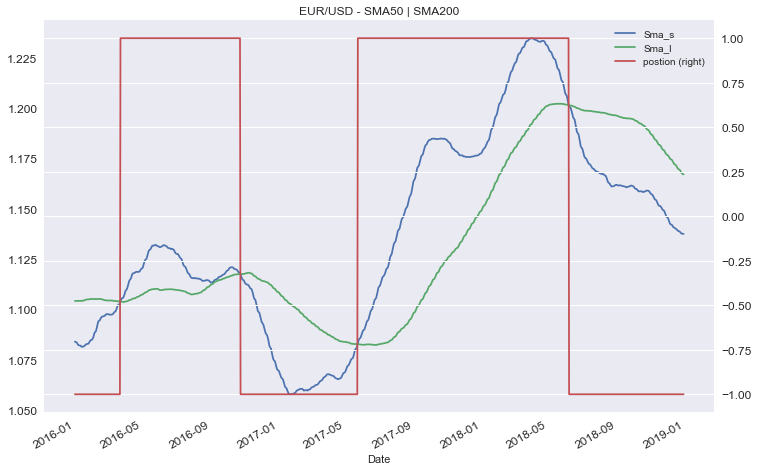

In [59]:
data.loc["2016":"2018":,["Sma_s","Sma_l","postion"]].plot(figsize = (12,8),title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l)
                                            ,fontsize = 12,secondary_y ="postion")
plt.show()